Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


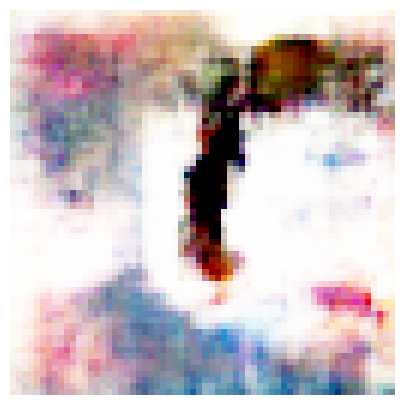

In [5]:

from huggingface_hub import hf_hub_download
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch import nn

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.ConvTranspose2d(100, 64 * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(64 * 8),
            nn.ReLU(True),
            nn.ConvTranspose2d(64 * 8, 64 * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 4),
            nn.ReLU(True),
            nn.ConvTranspose2d(64 * 4, 64 * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 2),
            nn.ReLU(True),
            nn.ConvTranspose2d(64 * 2, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input)

path = hf_hub_download('huggan/ArtGAN', 'ArtGAN.pt')
model = torch.load(path, map_location=torch.device('cpu'))
device = 'cuda' if torch.cuda.is_available() else 'cpu'

def generate(seed):
    with torch.no_grad():
        noise = torch.randn(seed, 100, 1, 1, device=device)
    with torch.no_grad():
        art = model(noise).detach().cpu()
    gen = np.transpose(art[-1], (1, 2, 0))
    fig = plt.figure(figsize=(5, 5))
    plt.imshow(gen)
    plt.axis('off')

generate(25)
